In [2]:
!python -m pip install pandas_datareader

In [76]:
!python -m pip install TensorFlow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

In [15]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np 
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import datasets
import seaborn as sns  # Bibliothèque pour la visualisation des données
import tensorflow.compat.v1 as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [3]:
start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [5]:
#sp_data.to_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\sp_data.csv', index = True)
sp_data= pd.read_csv(r'C:\Users\Hajar\Desktop\S4\ML\Projet\RNA_S&P500\sp_data.csv', index_col='Date', parse_dates=True)
# Change to datetime datatype.
#sp_data.loc[:, 'Date'] = pd.to_datetime(sp_data.loc[:,'Date'], format="%Y/%m/%d")

In [6]:
sp_data.head()
sp_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2004-12-17', '2004-12-20', '2004-12-21', '2004-12-22',
               '2004-12-23', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

<AxesSubplot:xlabel='Date'>

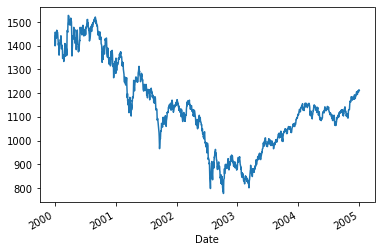

In [7]:
# Simple plotting of Amazon Stock Price

# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# # First Subplot:"Close Price History"
# ax1.plot(sp_data["Date"], sp_data["Close"], color="blue")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")
# ax1.set_title("Close-High-low Price History")

# # Second Subplot:"High Price History"
# ax1.plot(sp_data["Date"], sp_data["High"], color="green")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Third Subplot:Low Price History"
# ax1.plot(sp_data["Date"], sp_data["Low"], color="red")
# ax1.set_xlabel("Date", fontsize=12)
# ax1.set_ylabel("Stock Price")

# # Fourth Subplot:"Volume History"
# ax2.plot(sp_data["Date"], sp_data["Volume"], color="orange")
# ax2.set_xlabel("Date", fontsize=12)
# ax2.set_ylabel("Stock Price")
# ax2.set_title("Volume History")
# plt.show()
sp_data['Close'].plot()

In [20]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_array = scaler.fit_transform(sp_data)

# df2 = pd.DataFrame(sp_data.index)
# df['Close'] = scaled_array.tolist()
df = pd.DataFrame(scaled_array, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df.index = sp_data.index

df.head()
# plt.plot(scaled_array)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454


In [21]:
scaled_array[0]

array([0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
       0.90376982])

In [22]:
df['2000': '2004']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454
...,...,...,...,...,...,...
2004-12-27,0.550933,0.581852,0.577288,0.570348,0.233905,0.570348
2004-12-28,0.550151,0.581852,0.570348,0.581830,0.259117,0.581830
2004-12-29,0.550562,0.589894,0.581830,0.581710,0.235517,0.581710


In [23]:
#tf.disable_v2_behavior()
df = df['Open'].values
df = df.reshape(-1, 1)
df

array([[0.92245909],
       [0.90376982],
       [0.82943929],
       ...,
       [0.58183037],
       [0.58171036],
       [0.5818437 ]])

In [24]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [25]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [26]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 70s 255ms/step - loss: 0.0686
Epoch 2/50
30/30 [==============================] - 7s 242ms/step - loss: 0.0063
Epoch 3/50
30/30 [==============================] - 7s 239ms/step - loss: 0.0053
Epoch 4/50
30/30 [==============================] - 8s 255ms/step - loss: 0.0054
Epoch 5/50
30/30 [==============================] - 7s 229ms/step - loss: 0.0047
Epoch 6/50
30/30 [==============================] - 7s 235ms/step - loss: 0.0058
Epoch 7/50
30/30 [==============================] - 7s 233ms/step - loss: 0.0049
Epoch 8/50
30/30 [==============================] - 7s 247ms/step - loss: 0.0045
Epoch 9/50
30/30 [==============================] - 8s 254ms/step - loss: 0.0044
Epoch 10/50
30/30 [==============================] - 7s 232ms/step - loss: 0.0039
Epoch 11/50
30/30 [==============================] - 7s 235ms/step - loss: 0.0036
Epoch 12/50
30/30 [==============================] - 7s 228ms/step - loss: 0.0036
Epoch 13/50
30/30 [=====

In [32]:
model = load_model('stock_prediction.h5')

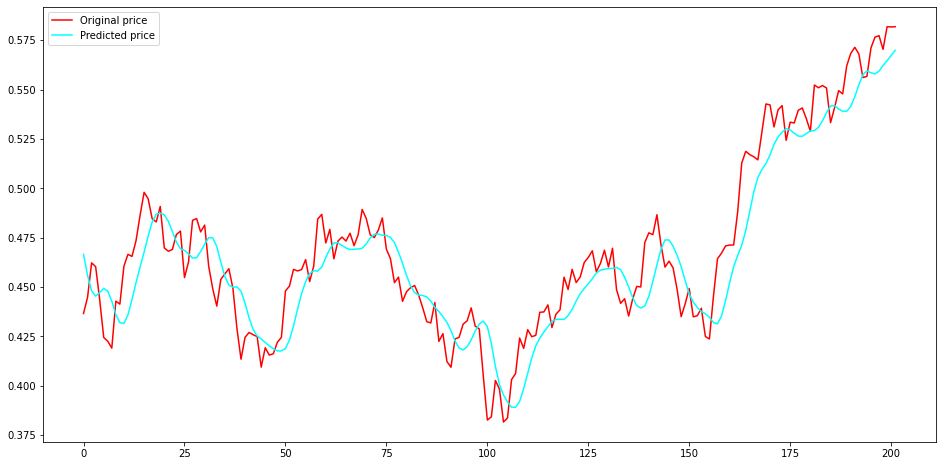

In [39]:
predictions = model.predict(x_test)
predictions.shape
# predictions = scaler.inverse_transform(predictions)
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#ffffff')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()